## Summary

For the classifier, we mainly used the combination of DMFB and iPSC dataset to train the model. 

Three models were designed here, including the logistic regression, convolution neural network and logistic regression with combination of four cluster features and features from CNN model. 

Preprocessed data were stored at  /data/figure1 . 

Four_feature_iPSC_DMFB.csv includes four features of clusters : summit_count, STD, unencoded G and count, which can be obtain by using scTSS

## Content

* model of logistic regression (Evaluation)
* Convolutional neural network
  - get bed file used for fetching reads
  - obtatin fasta file
  - tidy the fasta file
  - use onehot encode to obtain 4x200 np array
  - combine four cluster features and onehot information for sequence
  - train CNN model and save CNN model
  - test model
* model 3 : combine 32 features from CNN with 4 cluster features.

* Use iPSC predict DMFB

## model of logistic regression (Evaluation)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from hilearn import ROC_plot, CrossValidation
import numpy as np
import pandas as pd

In [4]:
fourfeaturedf=pd.read_csv('/home/houruiyan/old_sctss/scTSS/data/figure1/Four_feature_iPSC_DMFB.csv',index_col=0)
fourfeaturedf

,name,label,source,summit_position,count,std,summit_count,unencoded_G
0,ENSG00000197530*1615834_1615960,1,iPSC,1615895,498,19.493589,60,0.425703
1,ENSG00000197530*1615414_1615557,1,iPSC,1615499,206,30.870698,15,0.422330
2,ENSG00000189409*1632162_1632227,1,iPSC,1632174,471,10.583005,98,0.541401
3,ENSG00000157870*2586695_2586903,1,iPSC,2586797,522,29.866369,82,0.450192
4,ENSG00000158109*3625014_3625086,1,iPSC,3625033,406,12.206556,79,0.448276
...,...,...,...,...,...,...,...,...
10987,ENSG00000169221*30357925_30358091,0,DMFB,30358005,654,41.327957,33,0.013761
10988,ENSG00000168906*85543246_85543368,0,DMFB,85543273,159,34.132096,14,0.056604
10989,ENSG00000196405*100137729_100137858,0,iPSC,100137757,50,29.647934,5,0.060000
10990,ENSG00000154027*77535915_77536031,0,DMFB,77536028,75,35.735137,4,0.066667


In [5]:
LogisticRegression = linear_model.LogisticRegression(solver='lbfgs')

In [6]:
X1=np.array(fourfeaturedf.iloc[:,4:])
X1

array([[4.98000000e+02, 1.94935887e+01, 6.00000000e+01, 4.25702811e-01],
       [2.06000000e+02, 3.08706981e+01, 1.50000000e+01, 4.22330097e-01],
       [4.71000000e+02, 1.05830052e+01, 9.80000000e+01, 5.41401274e-01],
       ...,
       [5.00000000e+01, 2.96479342e+01, 5.00000000e+00, 6.00000000e-02],
       [7.50000000e+01, 3.57351368e+01, 4.00000000e+00, 6.66666667e-02],
       [1.22000000e+02, 2.99499583e+01, 9.00000000e+00, 4.91803279e-02]])

In [7]:
X1.shape

(10992, 4)

In [8]:
Y1=np.array(fourfeaturedf['label'])
Y1

array([1, 1, 1, ..., 0, 0, 0])

In [10]:
CV = CrossValidation(X1, Y1)
Y2_pre, Y2_score = CV.cv_classification(model=LogisticRegression, folds=10)

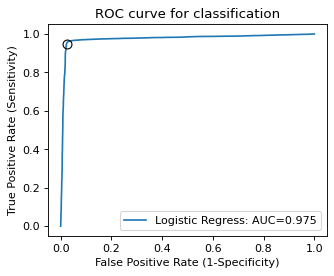

In [11]:
fig = plt.figure(figsize=(4.5, 3.5), dpi=80)
ROC_plot(Y1, Y2_score[:,1], legend_label="Logistic Regress", threshold=0.5)
plt.title("ROC curve for classification")

# fig.savefig("cv_classification.pdf", dpi=300, bbox_inches='tight')
plt.show()

# combinedf=pd.DataFrame({'fourfeature_groudTruth':Y1,'fourfeature_Rscore':Y2_score[:,1]})
# combinedf

# combinedf.to_csv('/data/users/houruiyan/sequence_CNN/fourfeature_Rscore.csv')

## Convolutional neural network model

## get bed file used for fetching reads

In [12]:
import pandas as pd

In [13]:
df=pd.read_csv('/home/houruiyan/old_sctss/scTSS/data/figure1/Four_feature_iPSC_DMFB.csv',index_col=0)
df

,name,label,source,summit_position,count,std,summit_count,unencoded_G
0,ENSG00000197530*1615834_1615960,1,iPSC,1615895,498,19.493589,60,0.425703
1,ENSG00000197530*1615414_1615557,1,iPSC,1615499,206,30.870698,15,0.422330
2,ENSG00000189409*1632162_1632227,1,iPSC,1632174,471,10.583005,98,0.541401
3,ENSG00000157870*2586695_2586903,1,iPSC,2586797,522,29.866369,82,0.450192
4,ENSG00000158109*3625014_3625086,1,iPSC,3625033,406,12.206556,79,0.448276
...,...,...,...,...,...,...,...,...
10987,ENSG00000169221*30357925_30358091,0,DMFB,30358005,654,41.327957,33,0.013761
10988,ENSG00000168906*85543246_85543368,0,DMFB,85543273,159,34.132096,14,0.056604
10989,ENSG00000196405*100137729_100137858,0,iPSC,100137757,50,29.647934,5,0.060000
10990,ENSG00000154027*77535915_77536031,0,DMFB,77536028,75,35.735137,4,0.066667


In [14]:
df['gene_id']=df['name'].str.split('*',expand=True)[0]
df

,name,label,source,summit_position,count,std,summit_count,unencoded_G,gene_id
0,ENSG00000197530*1615834_1615960,1,iPSC,1615895,498,19.493589,60,0.425703,ENSG00000197530
1,ENSG00000197530*1615414_1615557,1,iPSC,1615499,206,30.870698,15,0.422330,ENSG00000197530
2,ENSG00000189409*1632162_1632227,1,iPSC,1632174,471,10.583005,98,0.541401,ENSG00000189409
3,ENSG00000157870*2586695_2586903,1,iPSC,2586797,522,29.866369,82,0.450192,ENSG00000157870
4,ENSG00000158109*3625014_3625086,1,iPSC,3625033,406,12.206556,79,0.448276,ENSG00000158109
...,...,...,...,...,...,...,...,...,...
10987,ENSG00000169221*30357925_30358091,0,DMFB,30358005,654,41.327957,33,0.013761,ENSG00000169221
10988,ENSG00000168906*85543246_85543368,0,DMFB,85543273,159,34.132096,14,0.056604,ENSG00000168906
10989,ENSG00000196405*100137729_100137858,0,iPSC,100137757,50,29.647934,5,0.060000,ENSG00000196405
10990,ENSG00000154027*77535915_77536031,0,DMFB,77536028,75,35.735137,4,0.066667,ENSG00000154027


In [15]:
refdf=pd.read_csv('/storage/yhhuang/users/ruiyan/15organ/SRR13075718_scTSS_out_new/ref_file/ref_gene.tsv',delimiter='\t')
refdf=refdf[['Chromosome','gene_id']]
refdf

,Chromosome,gene_id
0,1,ENSG00000243485
1,1,ENSG00000186092
2,1,ENSG00000241599
3,1,ENSG00000286448
4,1,ENSG00000236601
...,...,...
36557,Y,ENSG00000187191
36558,Y,ENSG00000185894
36559,Y,ENSG00000228296
36560,Y,ENSG00000223641


In [16]:
df=df.merge(refdf,on='gene_id')
df

,name,label,source,summit_position,count,std,summit_count,unencoded_G,gene_id,Chromosome
0,ENSG00000197530*1615834_1615960,1,iPSC,1615895,498,19.493589,60,0.425703,ENSG00000197530,1
1,ENSG00000197530*1615414_1615557,1,iPSC,1615499,206,30.870698,15,0.422330,ENSG00000197530,1
2,ENSG00000189409*1632162_1632227,1,iPSC,1632174,471,10.583005,98,0.541401,ENSG00000189409,1
3,ENSG00000157870*2586695_2586903,1,iPSC,2586797,522,29.866369,82,0.450192,ENSG00000157870,1
4,ENSG00000157870*2590553_2590648,0,DMFB,2590645,109,28.774989,16,0.027523,ENSG00000157870,1
...,...,...,...,...,...,...,...,...,...,...
10987,ENSG00000188343*93728202_93728316,0,DMFB,93728304,74,27.856777,6,0.081081,ENSG00000188343,8
10988,ENSG00000049618*156829216_156829306,0,DMFB,156829276,54,27.110883,5,0.074074,ENSG00000049618,6
10989,ENSG00000137312*30741188_30741323,0,DMFB,30741189,99,39.610605,13,0.060606,ENSG00000137312,6
10990,ENSG00000183751*1977118_1977283,0,iPSC,1977239,63,43.954522,7,0.047619,ENSG00000183751,16


In [17]:
summitdf=df[['Chromosome','summit_position','name','label']]
summitdf

,Chromosome,summit_position,name,label
0,1,1615895,ENSG00000197530*1615834_1615960,1
1,1,1615499,ENSG00000197530*1615414_1615557,1
2,1,1632174,ENSG00000189409*1632162_1632227,1
3,1,2586797,ENSG00000157870*2586695_2586903,1
4,1,2590645,ENSG00000157870*2590553_2590648,0
...,...,...,...,...
10987,8,93728304,ENSG00000188343*93728202_93728316,0
10988,6,156829276,ENSG00000049618*156829216_156829306,0
10989,6,30741189,ENSG00000137312*30741188_30741323,0
10990,16,1977239,ENSG00000183751*1977118_1977283,0


In [18]:
summitdf['summit_start']=summitdf['summit_position']-100
summitdf['summit_stop']=summitdf['summit_position']+100
summitdf

,Chromosome,summit_position,name,label,summit_start,summit_stop
0,1,1615895,ENSG00000197530*1615834_1615960,1,1615795,1615995
1,1,1615499,ENSG00000197530*1615414_1615557,1,1615399,1615599
2,1,1632174,ENSG00000189409*1632162_1632227,1,1632074,1632274
3,1,2586797,ENSG00000157870*2586695_2586903,1,2586697,2586897
4,1,2590645,ENSG00000157870*2590553_2590648,0,2590545,2590745
...,...,...,...,...,...,...
10987,8,93728304,ENSG00000188343*93728202_93728316,0,93728204,93728404
10988,6,156829276,ENSG00000049618*156829216_156829306,0,156829176,156829376
10989,6,30741189,ENSG00000137312*30741188_30741323,0,30741089,30741289
10990,16,1977239,ENSG00000183751*1977118_1977283,0,1977139,1977339


In [19]:
summitdf['name']=summitdf['name']+'>'+summitdf['label'].astype('str')
summitdf

,Chromosome,summit_position,name,label,summit_start,summit_stop
0,1,1615895,ENSG00000197530*1615834_1615960>1,1,1615795,1615995
1,1,1615499,ENSG00000197530*1615414_1615557>1,1,1615399,1615599
2,1,1632174,ENSG00000189409*1632162_1632227>1,1,1632074,1632274
3,1,2586797,ENSG00000157870*2586695_2586903>1,1,2586697,2586897
4,1,2590645,ENSG00000157870*2590553_2590648>0,0,2590545,2590745
...,...,...,...,...,...,...
10987,8,93728304,ENSG00000188343*93728202_93728316>0,0,93728204,93728404
10988,6,156829276,ENSG00000049618*156829216_156829306>0,0,156829176,156829376
10989,6,30741189,ENSG00000137312*30741188_30741323>0,0,30741089,30741289
10990,16,1977239,ENSG00000183751*1977118_1977283>0,0,1977139,1977339


In [20]:
summitbeddf=summitdf[['Chromosome','summit_start','summit_stop','name']]
summitbeddf

,Chromosome,summit_start,summit_stop,name
0,1,1615795,1615995,ENSG00000197530*1615834_1615960>1
1,1,1615399,1615599,ENSG00000197530*1615414_1615557>1
2,1,1632074,1632274,ENSG00000189409*1632162_1632227>1
3,1,2586697,2586897,ENSG00000157870*2586695_2586903>1
4,1,2590545,2590745,ENSG00000157870*2590553_2590648>0
...,...,...,...,...
10987,8,93728204,93728404,ENSG00000188343*93728202_93728316>0
10988,6,156829176,156829376,ENSG00000049618*156829216_156829306>0
10989,6,30741089,30741289,ENSG00000137312*30741188_30741323>0
10990,16,1977139,1977339,ENSG00000183751*1977118_1977283>0


In [21]:
summitbeddf['Chromosome']='chr'+summitbeddf['Chromosome'].astype('str')
summitbeddf

,Chromosome,summit_start,summit_stop,name
0,chr1,1615795,1615995,ENSG00000197530*1615834_1615960>1
1,chr1,1615399,1615599,ENSG00000197530*1615414_1615557>1
2,chr1,1632074,1632274,ENSG00000189409*1632162_1632227>1
3,chr1,2586697,2586897,ENSG00000157870*2586695_2586903>1
4,chr1,2590545,2590745,ENSG00000157870*2590553_2590648>0
...,...,...,...,...
10987,chr8,93728204,93728404,ENSG00000188343*93728202_93728316>0
10988,chr6,156829176,156829376,ENSG00000049618*156829216_156829306>0
10989,chr6,30741089,30741289,ENSG00000137312*30741188_30741323>0
10990,chr16,1977139,1977339,ENSG00000183751*1977118_1977283>0


In [22]:
summitbeddf.to_csv('/storage/yhhuang/users/ruiyan/data_from_SCAFE/iPSC_DMFB_fetch_fasta.bed',sep='\t',index=None,header=None)

## obtatin fasta file

bedtools getfasta -name  -fi /storage/yhhuang/users/ruiyan/annotation/refdata-gex-GRCh38-2020-A/fasta/genome.fa   -bed iPSC_DMFB_fetch_fasta.bed   -fo All_sequence_used_for_test.fa

## tidy the fasta file

In [24]:
import pandas as pd

In [25]:
fastadf=pd.read_csv('/storage/yhhuang/users/ruiyan/data_from_SCAFE/All_sequence_used_for_test.fa',header=None)
fastadf

,0
0,>ENSG00000197530*1615834_1615960>1::chr1:16157...
1,GCGCAGCGCCGCCGCGGGGCCTCCTGGGAGTTGTGGTCCGGCCACC...
2,>ENSG00000197530*1615414_1615557>1::chr1:16153...
3,GCTCCCGCGTGACGCACTTCCGGTGCTTGCCCTGCCCATCCCCGTG...
4,>ENSG00000189409*1632162_1632227>1::chr1:16320...
...,...
21979,ATGTATGCTCTTGGATCCACTGTCTCTCACAGACTAGTGTGGGCCT...
21980,>ENSG00000183751*1977118_1977283>0::chr16:1977...
21981,ACAGTGCCAGCTGCTGGGTGTCTTCTCAGGCCACCGGCGTGGCCTC...
21982,>ENSG00000070404*682523_682642>0::chr19:682433...


In [26]:
namedf=fastadf[::2]
namedf.reset_index(inplace=True,drop=True)
namedf

,0
0,>ENSG00000197530*1615834_1615960>1::chr1:16157...
1,>ENSG00000197530*1615414_1615557>1::chr1:16153...
2,>ENSG00000189409*1632162_1632227>1::chr1:16320...
3,>ENSG00000157870*2586695_2586903>1::chr1:25866...
4,>ENSG00000157870*2590553_2590648>0::chr1:25905...
...,...
10987,>ENSG00000188343*93728202_93728316>0::chr8:937...
10988,>ENSG00000049618*156829216_156829306>0::chr6:1...
10989,>ENSG00000137312*30741188_30741323>0::chr6:307...
10990,>ENSG00000183751*1977118_1977283>0::chr16:1977...


In [27]:
sequencedf=fastadf[1::2]
sequencedf.reset_index(inplace=True,drop=True)
sequencedf

,0
0,GCGCAGCGCCGCCGCGGGGCCTCCTGGGAGTTGTGGTCCGGCCACC...
1,GCTCCCGCGTGACGCACTTCCGGTGCTTGCCCTGCCCATCCCCGTG...
2,CGTCTCCCTCCCCCCCACCACACCGGGCTGTAACCCGAGCCGCCGA...
3,CGGGCCCGGGGCGGAGACGAGCCCGAAGGGGCGGGGCCTCGGCGGC...
4,TCACTCTCTCCCACCCCCGGGCAGCTGTTTTGCCCAAGACCACTGC...
...,...
10987,GTATCCACTTGTCGACTAAGAAAGGATCAACAAGCAGAAGATGATG...
10988,TTTGTAATAAAGAATGAATTAATAAACCGACTTCTTTTATGTCTTC...
10989,ATGTATGCTCTTGGATCCACTGTCTCTCACAGACTAGTGTGGGCCT...
10990,ACAGTGCCAGCTGCTGGGTGTCTTCTCAGGCCACCGGCGTGGCCTC...


In [28]:
newdf=pd.concat([namedf,sequencedf],axis=1)
newdf

,0,0
0,>ENSG00000197530*1615834_1615960>1::chr1:16157...,GCGCAGCGCCGCCGCGGGGCCTCCTGGGAGTTGTGGTCCGGCCACC...
1,>ENSG00000197530*1615414_1615557>1::chr1:16153...,GCTCCCGCGTGACGCACTTCCGGTGCTTGCCCTGCCCATCCCCGTG...
2,>ENSG00000189409*1632162_1632227>1::chr1:16320...,CGTCTCCCTCCCCCCCACCACACCGGGCTGTAACCCGAGCCGCCGA...
3,>ENSG00000157870*2586695_2586903>1::chr1:25866...,CGGGCCCGGGGCGGAGACGAGCCCGAAGGGGCGGGGCCTCGGCGGC...
4,>ENSG00000157870*2590553_2590648>0::chr1:25905...,TCACTCTCTCCCACCCCCGGGCAGCTGTTTTGCCCAAGACCACTGC...
...,...,...
10987,>ENSG00000188343*93728202_93728316>0::chr8:937...,GTATCCACTTGTCGACTAAGAAAGGATCAACAAGCAGAAGATGATG...
10988,>ENSG00000049618*156829216_156829306>0::chr6:1...,TTTGTAATAAAGAATGAATTAATAAACCGACTTCTTTTATGTCTTC...
10989,>ENSG00000137312*30741188_30741323>0::chr6:307...,ATGTATGCTCTTGGATCCACTGTCTCTCACAGACTAGTGTGGGCCT...
10990,>ENSG00000183751*1977118_1977283>0::chr16:1977...,ACAGTGCCAGCTGCTGGGTGTCTTCTCAGGCCACCGGCGTGGCCTC...


In [29]:
newdf.columns=['name','sequence']
newdf

,name,sequence
0,>ENSG00000197530*1615834_1615960>1::chr1:16157...,GCGCAGCGCCGCCGCGGGGCCTCCTGGGAGTTGTGGTCCGGCCACC...
1,>ENSG00000197530*1615414_1615557>1::chr1:16153...,GCTCCCGCGTGACGCACTTCCGGTGCTTGCCCTGCCCATCCCCGTG...
2,>ENSG00000189409*1632162_1632227>1::chr1:16320...,CGTCTCCCTCCCCCCCACCACACCGGGCTGTAACCCGAGCCGCCGA...
3,>ENSG00000157870*2586695_2586903>1::chr1:25866...,CGGGCCCGGGGCGGAGACGAGCCCGAAGGGGCGGGGCCTCGGCGGC...
4,>ENSG00000157870*2590553_2590648>0::chr1:25905...,TCACTCTCTCCCACCCCCGGGCAGCTGTTTTGCCCAAGACCACTGC...
...,...,...
10987,>ENSG00000188343*93728202_93728316>0::chr8:937...,GTATCCACTTGTCGACTAAGAAAGGATCAACAAGCAGAAGATGATG...
10988,>ENSG00000049618*156829216_156829306>0::chr6:1...,TTTGTAATAAAGAATGAATTAATAAACCGACTTCTTTTATGTCTTC...
10989,>ENSG00000137312*30741188_30741323>0::chr6:307...,ATGTATGCTCTTGGATCCACTGTCTCTCACAGACTAGTGTGGGCCT...
10990,>ENSG00000183751*1977118_1977283>0::chr16:1977...,ACAGTGCCAGCTGCTGGGTGTCTTCTCAGGCCACCGGCGTGGCCTC...


In [30]:
newdf['label']=newdf['name'].str.split('>',expand=True)[2].str.split('::',expand=True)[0]
newdf

,name,sequence,label
0,>ENSG00000197530*1615834_1615960>1::chr1:16157...,GCGCAGCGCCGCCGCGGGGCCTCCTGGGAGTTGTGGTCCGGCCACC...,1
1,>ENSG00000197530*1615414_1615557>1::chr1:16153...,GCTCCCGCGTGACGCACTTCCGGTGCTTGCCCTGCCCATCCCCGTG...,1
2,>ENSG00000189409*1632162_1632227>1::chr1:16320...,CGTCTCCCTCCCCCCCACCACACCGGGCTGTAACCCGAGCCGCCGA...,1
3,>ENSG00000157870*2586695_2586903>1::chr1:25866...,CGGGCCCGGGGCGGAGACGAGCCCGAAGGGGCGGGGCCTCGGCGGC...,1
4,>ENSG00000157870*2590553_2590648>0::chr1:25905...,TCACTCTCTCCCACCCCCGGGCAGCTGTTTTGCCCAAGACCACTGC...,0
...,...,...,...
10987,>ENSG00000188343*93728202_93728316>0::chr8:937...,GTATCCACTTGTCGACTAAGAAAGGATCAACAAGCAGAAGATGATG...,0
10988,>ENSG00000049618*156829216_156829306>0::chr6:1...,TTTGTAATAAAGAATGAATTAATAAACCGACTTCTTTTATGTCTTC...,0
10989,>ENSG00000137312*30741188_30741323>0::chr6:307...,ATGTATGCTCTTGGATCCACTGTCTCTCACAGACTAGTGTGGGCCT...,0
10990,>ENSG00000183751*1977118_1977283>0::chr16:1977...,ACAGTGCCAGCTGCTGGGTGTCTTCTCAGGCCACCGGCGTGGCCTC...,0


In [31]:
newdf.to_csv('/storage/yhhuang/users/ruiyan/data_from_SCAFE/sequence_for_CNN.csv')

## use onehot encode to obtain 4x200 np array

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

In [33]:
def create_pixel_df(seq):
    int_enc = LabelEncoder() # setup class instance to encode the four different bases to integer values (1D)
    one_hot_enc = OneHotEncoder(categories=[range(4)]) # setup one hot encoder to encode integer encoded classes (1D) to one hot encoded array (4D)
    #print(one_hot_enc)
    enc = int_enc.fit_transform(list(seq)) # bases (ACGT) to int (0,1,2,3)
    enc = np.array(enc).reshape(-1,1) # reshape to get rank 2 array (from rank 1 array)
    enc = one_hot_enc.fit_transform(enc) # encoded integer encoded bases to sparse matrix (sparse matrix dtype)
    enc = enc.toarray().T.flatten() # export sparse matrix to np array
    #print(enc)
    return enc

In [34]:
df=pd.read_csv('/storage/yhhuang/users/ruiyan/data_from_SCAFE/sequence_for_CNN.csv',index_col=0)
df

,name,sequence,label
0,>ENSG00000197530*1615834_1615960>1::chr1:16157...,GCGCAGCGCCGCCGCGGGGCCTCCTGGGAGTTGTGGTCCGGCCACC...,1
1,>ENSG00000197530*1615414_1615557>1::chr1:16153...,GCTCCCGCGTGACGCACTTCCGGTGCTTGCCCTGCCCATCCCCGTG...,1
2,>ENSG00000189409*1632162_1632227>1::chr1:16320...,CGTCTCCCTCCCCCCCACCACACCGGGCTGTAACCCGAGCCGCCGA...,1
3,>ENSG00000157870*2586695_2586903>1::chr1:25866...,CGGGCCCGGGGCGGAGACGAGCCCGAAGGGGCGGGGCCTCGGCGGC...,1
4,>ENSG00000157870*2590553_2590648>0::chr1:25905...,TCACTCTCTCCCACCCCCGGGCAGCTGTTTTGCCCAAGACCACTGC...,0
...,...,...,...
10987,>ENSG00000188343*93728202_93728316>0::chr8:937...,GTATCCACTTGTCGACTAAGAAAGGATCAACAAGCAGAAGATGATG...,0
10988,>ENSG00000049618*156829216_156829306>0::chr6:1...,TTTGTAATAAAGAATGAATTAATAAACCGACTTCTTTTATGTCTTC...,0
10989,>ENSG00000137312*30741188_30741323>0::chr6:307...,ATGTATGCTCTTGGATCCACTGTCTCTCACAGACTAGTGTGGGCCT...,0
10990,>ENSG00000183751*1977118_1977283>0::chr16:1977...,ACAGTGCCAGCTGCTGGGTGTCTTCTCAGGCCACCGGCGTGGCCTC...,0


In [35]:
onehot_seqls=[]
for i in df['sequence']:
    onehot_seqls.append(create_pixel_df(i))
    

In [36]:
pixeldf=pd.DataFrame(onehot_seqls)
pixeldf

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10988,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10989,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
10990,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [37]:
inputdf=pd.concat([df[['name','label']],pixeldf],axis=1)
inputdf

,name,label,0,1,2,3,4,5,6,7,...,790,791,792,793,794,795,796,797,798,799
0,>ENSG00000197530*1615834_1615960>1::chr1:16157...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,>ENSG00000197530*1615414_1615557>1::chr1:16153...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,>ENSG00000189409*1632162_1632227>1::chr1:16320...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,>ENSG00000157870*2586695_2586903>1::chr1:25866...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,>ENSG00000157870*2590553_2590648>0::chr1:25905...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,>ENSG00000188343*93728202_93728316>0::chr8:937...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10988,>ENSG00000049618*156829216_156829306>0::chr6:1...,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10989,>ENSG00000137312*30741188_30741323>0::chr6:307...,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
10990,>ENSG00000183751*1977118_1977283>0::chr16:1977...,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [38]:
inputdf.to_csv('/storage/yhhuang/users/ruiyan/data_from_SCAFE/onehot_for_CNN.csv')

## combine four cluster features and onehot information for sequence

In [39]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from hilearn import ROC_plot, CrossValidation
import numpy as np
import pandas as pd
import pickle

In [40]:
fourfeaturedf=pd.read_csv('/storage/yhhuang/users/ruiyan/iPSC/scRNAseq/scTSS_related/two_dataset_Feature.csv',index_col=0)
fourfeaturedf

,name,label,source,summit_position,count,std,summit_count,unencoded_G
0,ENSG00000197530*1615834_1615960,1,iPSC,1615895,498,19.493589,60,0.425703
1,ENSG00000197530*1615414_1615557,1,iPSC,1615499,206,30.870698,15,0.422330
2,ENSG00000189409*1632162_1632227,1,iPSC,1632174,471,10.583005,98,0.541401
3,ENSG00000157870*2586695_2586903,1,iPSC,2586797,522,29.866369,82,0.450192
4,ENSG00000158109*3625014_3625086,1,iPSC,3625033,406,12.206556,79,0.448276
...,...,...,...,...,...,...,...,...
10987,ENSG00000169221*30357925_30358091,0,DMFB,30358005,654,41.327957,33,0.013761
10988,ENSG00000168906*85543246_85543368,0,DMFB,85543273,159,34.132096,14,0.056604
10989,ENSG00000196405*100137729_100137858,0,iPSC,100137757,50,29.647934,5,0.060000
10990,ENSG00000154027*77535915_77536031,0,DMFB,77536028,75,35.735137,4,0.066667


In [41]:
sequencedf=pd.read_csv('/storage/yhhuang/users/ruiyan/data_from_SCAFE/onehot_for_CNN.csv',index_col=0)
sequencedf

,name,label,0,1,2,3,4,5,6,7,...,790,791,792,793,794,795,796,797,798,799
0,>ENSG00000197530*1615834_1615960>1::chr1:16157...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,>ENSG00000197530*1615414_1615557>1::chr1:16153...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,>ENSG00000189409*1632162_1632227>1::chr1:16320...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,>ENSG00000157870*2586695_2586903>1::chr1:25866...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,>ENSG00000157870*2590553_2590648>0::chr1:25905...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,>ENSG00000188343*93728202_93728316>0::chr8:937...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10988,>ENSG00000049618*156829216_156829306>0::chr6:1...,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10989,>ENSG00000137312*30741188_30741323>0::chr6:307...,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
10990,>ENSG00000183751*1977118_1977283>0::chr16:1977...,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [42]:
sequencedf['name']=sequencedf['name'].str.split('>',expand=True)[1]
sequencedf

,name,label,0,1,2,3,4,5,6,7,...,790,791,792,793,794,795,796,797,798,799
0,ENSG00000197530*1615834_1615960,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,ENSG00000197530*1615414_1615557,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,ENSG00000189409*1632162_1632227,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENSG00000157870*2586695_2586903,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ENSG00000157870*2590553_2590648,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,ENSG00000188343*93728202_93728316,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10988,ENSG00000049618*156829216_156829306,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10989,ENSG00000137312*30741188_30741323,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
10990,ENSG00000183751*1977118_1977283,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [43]:
allfeaturedf=fourfeaturedf.merge(sequencedf,on=['name','label'])
allfeaturedf

,name,label,source,summit_position,count,std,summit_count,unencoded_G,0,1,...,790,791,792,793,794,795,796,797,798,799
0,ENSG00000197530*1615834_1615960,1,iPSC,1615895,498,19.493589,60,0.425703,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,ENSG00000197530*1615414_1615557,1,iPSC,1615499,206,30.870698,15,0.422330,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,ENSG00000189409*1632162_1632227,1,iPSC,1632174,471,10.583005,98,0.541401,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENSG00000157870*2586695_2586903,1,iPSC,2586797,522,29.866369,82,0.450192,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ENSG00000158109*3625014_3625086,1,iPSC,3625033,406,12.206556,79,0.448276,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,ENSG00000169221*30357925_30358091,0,DMFB,30358005,654,41.327957,33,0.013761,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
10988,ENSG00000168906*85543246_85543368,0,DMFB,85543273,159,34.132096,14,0.056604,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10989,ENSG00000196405*100137729_100137858,0,iPSC,100137757,50,29.647934,5,0.060000,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
10990,ENSG00000154027*77535915_77536031,0,DMFB,77536028,75,35.735137,4,0.066667,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [44]:
allfeaturedf.to_csv('/storage/yhhuang/users/ruiyan/data_from_SCAFE/four_sequence_feature.csv')

## train CNN model and save CNN model 
(these steps run at the GPU; be limited to this device, we did not run this code.)

In [45]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from hilearn.plot import ROC_plot

In [46]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
## 配置其他超参数，如batch_size, num_workers, learning rate, 以及总的epochs
batch_size = 256
num_workers = 4   # 对于Windows用户，这里应设置为0，否则会出现多线程错误
lr = 1e-4
epochs = 500

In [48]:
allfeaturedf=pd.read_csv('/storage/yhhuang/users/ruiyan/data_from_SCAFE/four_sequence_feature.csv',index_col=0)
allfeaturedf

,name,label,source,summit_position,count,std,summit_count,unencoded_G,0,1,...,790,791,792,793,794,795,796,797,798,799
0,ENSG00000197530*1615834_1615960,1,iPSC,1615895,498,19.493589,60,0.425703,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,ENSG00000197530*1615414_1615557,1,iPSC,1615499,206,30.870698,15,0.422330,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,ENSG00000189409*1632162_1632227,1,iPSC,1632174,471,10.583005,98,0.541401,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENSG00000157870*2586695_2586903,1,iPSC,2586797,522,29.866369,82,0.450192,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ENSG00000158109*3625014_3625086,1,iPSC,3625033,406,12.206556,79,0.448276,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,ENSG00000169221*30357925_30358091,0,DMFB,30358005,654,41.327957,33,0.013761,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
10988,ENSG00000168906*85543246_85543368,0,DMFB,85543273,159,34.132096,14,0.056604,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10989,ENSG00000196405*100137729_100137858,0,iPSC,100137757,50,29.647934,5,0.060000,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
10990,ENSG00000154027*77535915_77536031,0,DMFB,77536028,75,35.735137,4,0.066667,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [49]:
train_df, test_df = train_test_split(allfeaturedf, test_size=0.2,random_state=666,shuffle=True)
train_df,validation_df=train_test_split(train_df,test_size=0.25,random_state=666,shuffle=True)

In [54]:
## 读取方式二：读入csv格式的数据，自行构建Dataset类
# csv数据下载链接：https://www.kaggle.com/zalando-research/fashionmnist
class FMDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.images = df.iloc[:,8:].values.astype(np.uint8)
        self.labels = df['label'].values
        self.extrafeatures=df.iloc[:,4:8].values
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = self.images[idx].reshape(4,200)
        #print(idx)
        
        label = int(self.labels[idx])
        extrafeature=self.extrafeatures[idx]
        
        if self.transform is not None:
            image = self.transform(image)
        else:
            image = torch.tensor(image, dtype=torch.float)
            
        label = torch.tensor(label, dtype=torch.long)
        extrafeature=torch.tensor(extrafeature,dtype=torch.float)
        
        return image, label,extrafeature

   

In [55]:
 
    
train_data = FMDataset(train_df)
test_data = FMDataset(test_df)
validation_data=FMDataset(validation_df)

In [56]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers, drop_last=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)
validation_loader=DataLoader(validation_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)


torch.Size([256, 4, 200]) torch.Size([256]) torch.Size([256, 4])


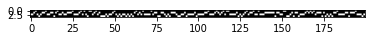

In [57]:
import matplotlib.pyplot as plt
image, label,extrafeature = next(iter(train_loader))
print(image.shape, label.shape,extrafeature.shape)
plt.imshow(image[0], cmap="gray")

In [58]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(4, 128, 8),
             nn.ReLU(),
            nn.Conv1d(128,64,4),
            nn.ReLU(),
             nn.BatchNorm1d(64),
              nn.MaxPool2d(2),
            nn.Dropout(0.4),
             nn.Flatten(),
            nn.Linear(3040, 32),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(
            nn.Linear(32, 2),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.conv(x)
        #print(x.shape)
        #combinex=torch.cat((x,extrafeature),dim=1)
        #x = x.view(-1, 3040)
        x = self.fc(x)
        # x = nn.functional.normalize(x)
        return x


In [60]:

model = Net()
# model = model.cuda()

In [61]:
criterion = nn.CrossEntropyLoss()

In [62]:
#optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.SGD(model.parameters(), lr=0.003,momentum=0.8)

In [63]:
def train(epoch):
    model.train()
    train_loss = 0
    for data, label,extrafeature in train_loader:
        data, label,extrafeature = data.cuda(), label.cuda(),extrafeature.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
    train_loss = train_loss/len(train_loader.dataset)
    #print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))
    return train_loss

In [64]:
  

from sklearn.metrics import confusion_matrix

In [65]:
def val(epoch):       
    model.eval()
    val_loss = 0
    gt_labels = []
    pred_labels = []
    y_scorels=[]
    with torch.no_grad():
        for data, label,extrafeature in test_loader:
            data, label,extrafeature = data.cuda(), label.cuda(),extrafeature.cuda()
            output = model(data)
            #print(output.shape)
            preds = torch.argmax(output, 1)
            gt_labels.append(label.cpu().data.numpy())
            pred_labels.append(preds.cpu().data.numpy())
            loss = criterion(output, label)
            val_loss += loss.item()*data.size(0)
            y_scorels.append(output[:,1].cpu().data.numpy())
            
            #y_scorels.extend(y_score.tolist())
            
    val_loss = val_loss/len(test_loader.dataset)
    gt_labels, pred_labels,y_scorels = np.concatenate(gt_labels), np.concatenate(pred_labels),np.concatenate(y_scorels)
    acc = np.sum(gt_labels==pred_labels)/len(pred_labels)
    auc=roc_auc_score(gt_labels, y_scorels)
    confu=confusion_matrix(gt_labels, pred_labels)
    
    
    #print('Epoch: {} \tValidation Loss: {:.6f}, Accuracy: {:6f},AUC:{:6f}'.format(epoch, val_loss, acc,auc))
    #print(confu)
    return val_loss,acc,auc

In [66]:
class SaveBestModel:
    """
    Class to save the best model while training. If the current epoch's 
    validation loss is less than the previous least less, then save the
    model state.
    """
    def __init__(
        self, best_valid_loss=float('inf')
    ):
        self.best_valid_loss = best_valid_loss
        
    def __call__(
        self, current_valid_loss, 
        epoch, model, optimizer, criterion
    ):
        if current_valid_loss < self.best_valid_loss:
            self.best_valid_loss = current_valid_loss
            print(f"\nBest validation loss: {self.best_valid_loss}")
            print(f"\nSaving best model for epoch: {epoch+1}\n")
            torch.save(                {'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': criterion},
                '/home/houruiyan/old_sctss/scTSS/data/figure1/best_model.pth')
  

In [67]:
save_best_model = SaveBestModel()

In [ ]:
trainlossls=[]
vallossls=[]
val_accls=[]
val_aucls=[]
for epoch in range(1, epochs+1):
    trainlossls.append(train(epoch))
    val_loss,val_acc,val_auc=val(epoch)
    vallossls.append(val_loss)
    val_accls.append(val_acc)
    val_aucls.append(val_auc)
    save_best_model(
    val_loss, epoch, model, optimizer, criterion
    )
    

In [ ]:
vallossls

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(500)
# tain loss
fig,axs= plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(10)

# plot the data
axs[0,0].plot(epoch,trainlossls)
axs[0, 0].set_title('Train Loss')y

axs[0,1].plot(epoch,vallossls)
axs[0, 1].set_title('Validation Loss')

axs[1,0].plot(epoch,val_accls)
axs[1, 0].set_title('Validation Accuracy')


axs[1,1].plot(epoch,val_aucls)
axs[1, 1].set_title('Validation AUC')

# test model

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from hilearn.plot import ROC_plot
from sklearn.metrics import confusion_matrix

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
## 配置其他超参数，如batch_size, num_workers, learning rate, 以及总的epochs
batch_size = 256
num_workers = 4   # 对于Windows用户，这里应设置为0，否则会出现多线程错误
lr = 1e-4
epochs = 2

allfeaturedf=pd.read_csv('/data/users/houruiyan/sequence_CNN/four_sequence_feature.csv',index_col=0)
allfeaturedf

train_df, test_df = train_test_split(allfeaturedf, test_size=0.2,random_state=666,shuffle=True)
train_df,validation_df=train_test_split(train_df,test_size=0.25,random_state=666,shuffle=True)

len(test_df)

## 读取方式二：读入csv格式的数据，自行构建Dataset类
# csv数据下载链接：https://www.kaggle.com/zalando-research/fashionmnist
class FMDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.images = df.iloc[:,7:].values.astype(np.uint8)
        self.labels = df['label'].values
        self.extrafeatures=df.iloc[:,3:7].values
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = self.images[idx].reshape(4,200)
        #print(idx)
        
        label = int(self.labels[idx])
        extrafeature=self.extrafeatures[idx]
        
        if self.transform is not None:
            image = self.transform(image)
        else:
            image = torch.tensor(image, dtype=torch.float)
            
        label = torch.tensor(label, dtype=torch.long)
        extrafeature=torch.tensor(extrafeature,dtype=torch.float)
        
        return image, label,extrafeature

 

train_data = FMDataset(train_df)
test_data = FMDataset(test_df)
validation_data=FMDataset(validation_df)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers,drop_last=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)
validation_loader=DataLoader(validation_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)

len(test_loader)

import matplotlib.pyplot as plt
image, label,extrafeature = next(iter(test_loader))
print(image.shape, label.shape,extrafeature.shape)
plt.imshow(image[0], cmap="gray")

## load model

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(4, 128, 8),
             nn.ReLU(),
            nn.Conv1d(128,64,4),
            nn.ReLU(),
             nn.BatchNorm1d(64),
              nn.MaxPool2d(2),
            nn.Dropout(0.4),
             nn.Flatten(),
            nn.Linear(3040, 32),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(
            nn.Linear(32, 2),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.conv(x)
        #print(x.shape)
        #combinex=torch.cat((x,extrafeature),dim=1)
        #x = x.view(-1, 3040)
        x = self.fc(x)
        # x = nn.functional.normalize(x)
        return x
    
    

    

model = Net()
model = model.cuda()

check_point=torch.load('/data/users/houruiyan/sequence_CNN/best_model.pth')
check_point

model.load_state_dict(check_point['model_state_dict'])

criterion = check_point['loss']

## Do test

def test(epoch):       
    model.eval()
    test_loss = 0
    gt_labels = []
    pred_labels = []
    y_scorels=[]
    with torch.no_grad():
        for data, label,extrafeature in test_loader:
            #print(data)
            data, label,extrafeature = data.cuda(), label.cuda(),extrafeature.cuda()
            output = model(data)
            #print(output.shape)
            preds = torch.argmax(output, 1)
            gt_labels.append(label.cpu().data.numpy())
            pred_labels.append(preds.cpu().data.numpy())
            loss = criterion(output, label)
            test_loss += loss.item()*data.size(0)
            y_scorels.append(output[:,1].cpu().data.numpy())
            
            #y_scorels.extend(y_score.tolist())
            
    # test_loss = test_loss/len(test_loader.dataset)
    # gt_labels, pred_labels,y_scorels = np.concatenate(gt_labels), np.concatenate(pred_labels),np.concatenate(y_scorels)
    # acc = np.sum(gt_labels==pred_labels)/len(pred_labels)
    # auc=roc_auc_score(gt_labels, y_scorels)
    # confu=confusion_matrix(gt_labels, pred_labels)
    
    
    #print('Epoch: {} \tValidation Loss: {:.6f}, Accuracy: {:6f},AUC:{:6f}'.format(epoch, val_loss, acc,auc))
    #print(confu)
    return gt_labels,y_scorels

gt_labels,y_scorels=test(1)

len(gt_labels)

20*256

groudtruthlabel=np.concatenate(gt_labels)
groudtruthlabel

y_scorels=np.concatenate(y_scorels)
y_scorels

res = ROC_plot(groudtruthlabel, y_scorels, threshold=0.5)

gtls=list(groudtruthlabel)
gtls

yscolels=list(y_scorels)
yscolels

onlysequencedf=pd.DataFrame({'Oly_sequence_groudTruth':gtls,'Oly_sequence_Score':yscolels})
onlysequencedf

onlysequencedf.to_csv('/data/users/houruiyan/sequence_CNN/only_sequence_Rscore.csv')

# model 3 : combine 32 features from CNN with 4 cluster features.

## get 32 dimensional features  

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from hilearn.plot import ROC_plot

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
## 配置其他超参数，如batch_size, num_workers, learning rate, 以及总的epochs
batch_size = 256
num_workers = 4   # 对于Windows用户，这里应设置为0，否则会出现多线程错误
lr = 1e-4
epochs = 200

allfeaturedf=pd.read_csv('/data/users/houruiyan/sequence_CNN/four_sequence_feature.csv',index_col=0)
allfeaturedf

allfeaturedf.drop_duplicates(inplace=True)
allfeaturedf

train_df, test_df = train_test_split(allfeaturedf, test_size=0.2,random_state=666,shuffle=True)
# train_df,validation_df=train_test_split(train_df,test_size=0.25,random_state=666,shuffle=True)

train_df

test_df

# csv数据下载链接：https://www.kaggle.com/zalando-research/fashionmnist
class FMDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.images = df.iloc[:,7:].values.astype(np.uint8)
        self.labels = df['label'].values
        self.name=df['name'].values
        
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = self.images[idx].reshape(4,200)
        #print(idx)
        
        label = int(self.labels[idx])
        name=self.name[idx]
        
        if self.transform is not None:
            image = self.transform(image)
        else:
            image = torch.tensor(image, dtype=torch.float)
            
        label = torch.tensor(label, dtype=torch.long)
        #name=torch.tensor(name,dtype=torch.long)
        
        return image, label,name

    

    

train_data = FMDataset(train_df)
test_data = FMDataset(test_df)
# validation_data=FMDataset(validation_df)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)
# validation_loader=DataLoader(validation_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)

import matplotlib.pyplot as plt
image, label,name = next(iter(train_loader))
print(image.shape, label.shape,len(name))
plt.imshow(image[0], cmap="gray")

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(4, 128, 8),
             nn.ReLU(),
            nn.Conv1d(128,64,4),
            nn.ReLU(),
             nn.BatchNorm1d(64),
              nn.MaxPool2d(2),
            nn.Dropout(0.4),
             nn.Flatten(),
            nn.Linear(3040, 32),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(
            nn.Linear(32, 2),
            nn.Softmax(dim=1)
        )
        
    def forward(self, x):
        x = self.conv(x)
        feature=x
        #print(x.shape)
        #combinex=torch.cat((x,extrafeature),dim=1)
        #x = x.view(-1, 3040)
        x = self.fc(x)
        # x = nn.functional.normalize(x)
        return x,feature

   

 

model = Net()
model = model.cuda()

criterion = nn.CrossEntropyLoss()

#optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.SGD(model.parameters(), lr=0.003,momentum=0.8)

def train(epoch):
    model.train()
    train_loss = 0
    train_feature=[]
    train_namels=[]
    for data, label,name in train_loader:
        data, label = data.cuda(), label.cuda()
        optimizer.zero_grad()
        output,feature = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
        train_feature.append(feature)
        train_namels.append(name)
        
    train_loss = train_loss/len(train_loader.dataset)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))
    return train_loss,train_feature,train_namels

    

from sklearn.metrics import confusion_matrix

def val(epoch):       
    model.eval()
    val_loss = 0
    gt_labels = []
    pred_labels = []
    y_scorels=[]
    featurels=[]
    namels=[]
    with torch.no_grad():
        for data, label,name in test_loader:
            data, label = data.cuda(), label.cuda()
            output,feature = model(data)
#             print(output.shape)
            preds = torch.argmax(output, 1)
            gt_labels.append(label.cpu().data.numpy())
            pred_labels.append(preds.cpu().data.numpy())
            loss = criterion(output, label)
            val_loss += loss.item()*data.size(0)
            y_scorels.append(output[:,1].cpu().data.numpy())
            featurels.append(feature)
            namels.append(name)
            
            #y_scorels.extend(y_score.tolist())
            
    val_loss = val_loss/len(test_loader.dataset)
    gt_labels, pred_labels,y_scorels = np.concatenate(gt_labels), np.concatenate(pred_labels),np.concatenate(y_scorels)
    acc = np.sum(gt_labels==pred_labels)/len(pred_labels)
    auc=roc_auc_score(gt_labels, y_scorels)
    confu=confusion_matrix(gt_labels, pred_labels)
    
    
    print('Epoch: {} \tValidation Loss: {:.6f}, Accuracy: {:6f},AUC:{:6f}'.format(epoch, val_loss, acc,auc))
    print(confu)
    return val_loss,featurels,namels

best_valid_loss=float('inf')
for epoch in range(1, epochs+1):
    epoch_trainloss,train_feature,train_name=train(epoch)
    epoch_validationloss,test_feature,test_name=val(epoch)
    if epoch_validationloss < best_valid_loss:
        best_valid_loss = epoch_validationloss
        finaltrainfeature=train_feature
        finaltestfeature=test_feature
        finaltrainname=train_name
        finaltestname=test_name
        

        

best_valid_loss

finaltrainfeature

len(finaltrainfeature)

finaltrainfeature[0].shape

len(finaltestfeature)

finaltestfeature[0].shape

## flatten

### train 

from functools import reduce


train_features=reduce(lambda x,y: torch.cat((x,y),0),finaltrainfeature)  


train_features.shape

def flatten(A):
    rt = []
    for i in A:
        if isinstance(i,list): rt.extend(flatten(i))
        else: rt.append(i)
    return rt

finaltrainnamels=[list(i) for i in finaltrainname]

newtrainname=flatten(finaltrainnamels)

len(newtrainname)

# create dataframe

trainfeaturedf=pd.DataFrame(train_features.cpu().detach().numpy())
trainfeaturedf.head(n=10)


trainfeaturedf.shape

trainfeaturedf['name']=newtrainname

trainfeaturedf.head(n=10)

### test

test_features=reduce(lambda x,y: torch.cat((x,y),0),finaltestfeature)
test_features.shape

finaltestnamels=[list(i) for i in finaltestname]

newtestname=flatten(finaltestnamels)

len(newtestname)

testfeaturedf=pd.DataFrame(test_features.cpu().detach().numpy())
testfeaturedf['name']=newtestname


testfeaturedf.head(n=10)

finaldf=pd.concat([trainfeaturedf,testfeaturedf],axis=0)

finaldf.shape

finaldf.to_csv('/data/users/houruiyan/sequence_CNN/fetch_32_feature.csv')

finaldf.shape

finaldf

## combined with four features and train with logistic regression model

In [3]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from hilearn import ROC_plot, CrossValidation
import numpy as np
import pandas as pd

In [5]:
fourfeaturedf=pd.read_csv('/home/houruiyan/old_sctss/scTSS/data/figure1/Four_feature_iPSC_DMFB.csv',index_col=0)
fourfeaturedf

,name,label,source,summit_position,count,std,summit_count,unencoded_G
0,ENSG00000197530*1615834_1615960,1,iPSC,1615895,498,19.493589,60,0.425703
1,ENSG00000197530*1615414_1615557,1,iPSC,1615499,206,30.870698,15,0.422330
2,ENSG00000189409*1632162_1632227,1,iPSC,1632174,471,10.583005,98,0.541401
3,ENSG00000157870*2586695_2586903,1,iPSC,2586797,522,29.866369,82,0.450192
4,ENSG00000158109*3625014_3625086,1,iPSC,3625033,406,12.206556,79,0.448276
...,...,...,...,...,...,...,...,...
10987,ENSG00000169221*30357925_30358091,0,DMFB,30358005,654,41.327957,33,0.013761
10988,ENSG00000168906*85543246_85543368,0,DMFB,85543273,159,34.132096,14,0.056604
10989,ENSG00000196405*100137729_100137858,0,iPSC,100137757,50,29.647934,5,0.060000
10990,ENSG00000154027*77535915_77536031,0,DMFB,77536028,75,35.735137,4,0.066667


In [6]:
feature32=pd.read_csv('/home/houruiyan/old_sctss/scTSS/data/figure1/fetch_32_feature.csv',index_col=0)
feature32

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,name
0,1.960507,10.051535,1.859944,7.299625,0.000000,2.116544,5.646024,0.550473,0.000000,0.977792,...,0.000000,1.055918,0.447642,0.053704,3.682727,0.194242,0.00000,2.765496,0.000000,ENSG00000135823*181022733_181022879
1,0.908108,5.608836,1.544157,4.658483,1.066899,1.066924,4.291572,4.997966,1.259465,1.051879,...,0.000000,3.290039,2.109059,1.123085,1.927372,3.174656,0.00000,2.302040,0.917973,ENSG00000101384*10673811_10673889
2,3.054676,7.136787,0.676959,6.755997,0.000000,0.000000,6.178521,0.000000,1.295546,0.000000,...,0.000000,4.490169,2.005694,0.183665,6.067612,0.000000,0.70347,0.139441,1.216311,ENSG00000165219*125261793_125261923
3,0.967257,2.460375,3.594872,1.686111,0.000000,2.095410,0.849635,3.549130,1.897891,3.863300,...,0.203168,3.108065,0.000000,1.015794,1.894840,4.943540,0.00000,5.303746,0.633479,ENSG00000186591*129834033_129834201
4,0.136399,0.000000,3.737949,1.132227,1.987050,2.941285,2.492581,1.244868,1.158277,6.156127,...,0.000000,2.679184,0.000000,0.591513,3.060887,6.440609,0.00000,7.211122,3.101669,ENSG00000169062*114286250_114286394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,3.651145,8.049392,3.204929,5.884194,0.000000,1.732782,7.113661,1.496631,0.330597,0.000000,...,0.000000,0.350112,0.000000,2.711120,4.065694,0.314045,0.00000,0.149918,0.865414,ENSG00000196757*11925067_11925176
2195,0.000000,2.009769,6.247351,3.352760,1.243662,5.301498,2.550420,2.663203,0.111349,3.517279,...,0.000000,1.312243,0.000000,1.514326,2.769791,4.790847,0.00000,7.212739,3.758027,ENSG00000172269*119097029_119097214
2196,0.109884,1.533424,3.877745,3.120645,0.000000,3.708295,1.566883,2.592980,0.954638,6.676790,...,0.000000,2.270037,0.429125,1.268003,2.291693,4.166054,0.00000,4.255413,4.667384,ENSG00000160753*155326872_155326983
2197,0.000000,0.000000,4.583042,0.000000,0.000000,6.932631,0.000000,1.776008,0.526784,7.635308,...,0.000000,5.287060,0.000000,0.642148,0.480691,8.529490,0.00000,9.695992,4.203460,ENSG00000131323*102897268_102897386


In [7]:
mergedf=fourfeaturedf.merge(feature32,on='name')
mergedf

,name,label,source,summit_position,count,std,summit_count,unencoded_G,0,1,...,22,23,24,25,26,27,28,29,30,31
0,ENSG00000197530*1615834_1615960,1,iPSC,1615895,498,19.493589,60,0.425703,0.279208,10.373527,...,2.006674,0.000000,1.253660,0.739301,0.000000,5.164981,0.117932,0.00000,0.000000,0.520329
1,ENSG00000197530*1615414_1615557,1,iPSC,1615499,206,30.870698,15,0.422330,1.546755,6.222280,...,1.092747,0.000000,1.990914,2.360059,1.023525,4.166094,3.180289,0.00000,1.754911,0.786385
2,ENSG00000189409*1632162_1632227,1,iPSC,1632174,471,10.583005,98,0.541401,2.402772,7.361918,...,1.163545,0.000000,0.756452,0.133535,0.295651,3.703962,1.616508,0.00000,0.871456,3.502901
3,ENSG00000157870*2586695_2586903,1,iPSC,2586797,522,29.866369,82,0.450192,1.858414,8.278692,...,0.400004,0.000000,1.384353,0.000000,0.000000,2.122768,1.465778,0.00000,0.000000,1.059956
4,ENSG00000158109*3625014_3625086,1,iPSC,3625033,406,12.206556,79,0.448276,2.264834,10.027104,...,0.213371,0.000000,1.606392,0.000000,0.463977,2.241523,0.000000,0.00000,0.000000,0.592368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,ENSG00000169221*30357925_30358091,0,DMFB,30358005,654,41.327957,33,0.013761,0.000000,1.188698,...,0.000000,0.000000,2.309885,0.000000,1.352500,0.454870,6.796998,0.00000,4.966971,3.282836
10988,ENSG00000168906*85543246_85543368,0,DMFB,85543273,159,34.132096,14,0.056604,2.035774,3.885167,...,0.353784,0.944019,3.156469,0.000000,1.696624,2.949013,4.503435,0.00000,5.441897,3.179482
10989,ENSG00000196405*100137729_100137858,0,iPSC,100137757,50,29.647934,5,0.060000,0.820583,1.621820,...,0.121439,0.000000,3.348414,0.949642,2.401861,0.263577,2.693204,0.00000,2.828718,2.343421
10990,ENSG00000154027*77535915_77536031,0,DMFB,77536028,75,35.735137,4,0.066667,0.000000,0.994125,...,0.000000,0.000000,3.815741,0.000000,2.636401,1.363992,6.841393,0.00000,7.666530,3.919909


In [8]:
LogisticRegression = linear_model.LogisticRegression(solver='lbfgs')

In [9]:
X1=np.array(mergedf.iloc[:,4:])
X1

array([[4.98000000e+02, 1.94935887e+01, 6.00000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 5.20329000e-01],
       [2.06000000e+02, 3.08706981e+01, 1.50000000e+01, ...,
        0.00000000e+00, 1.75491050e+00, 7.86384900e-01],
       [4.71000000e+02, 1.05830052e+01, 9.80000000e+01, ...,
        0.00000000e+00, 8.71455670e-01, 3.50290130e+00],
       ...,
       [5.00000000e+01, 2.96479342e+01, 5.00000000e+00, ...,
        0.00000000e+00, 2.82871800e+00, 2.34342120e+00],
       [7.50000000e+01, 3.57351368e+01, 4.00000000e+00, ...,
        0.00000000e+00, 7.66652970e+00, 3.91990850e+00],
       [1.22000000e+02, 2.99499583e+01, 9.00000000e+00, ...,
        1.69895660e-02, 5.59628630e+00, 3.43512180e+00]])

In [10]:
X1.shape

(10992, 36)

In [11]:
Y1=np.array(mergedf['label'])
Y1

array([1, 1, 1, ..., 0, 0, 0])

In [12]:
CV = CrossValidation(X1, Y1)
Y2_pre, Y2_score = CV.cv_classification(model=LogisticRegression, folds=10)

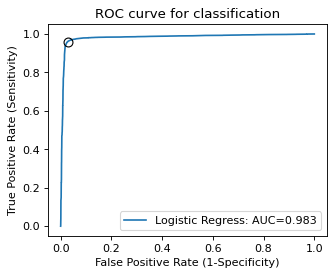

In [13]:
fig = plt.figure(figsize=(4.5, 3.5), dpi=80)
ROC_plot(Y1, Y2_score[:,1], legend_label="Logistic Regress", threshold=0.5)
plt.title("ROC curve for classification")

# fig.savefig("cv_classification.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# combinedf=pd.DataFrame({'combine_groudTruth':Y1,'combine_Rscore':Y2_score[:,1]})
# combinedf

# combinedf.to_csv('/data/users/houruiyan/sequence_CNN/combine_Rscore.csv')

# Use iPSC predict DMFB

In [14]:
import pandas as pd
from hilearn import corr_plot
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from hilearn.plot import ROC_plot

In [15]:
df=pd.read_csv('/storage/yhhuang/users/ruiyan/iPSC/scRNAseq/scTSS_related/two_dataset_Feature.csv',index_col=0)
df

,name,label,source,summit_position,count,std,summit_count,unencoded_G
0,ENSG00000197530*1615834_1615960,1,iPSC,1615895,498,19.493589,60,0.425703
1,ENSG00000197530*1615414_1615557,1,iPSC,1615499,206,30.870698,15,0.422330
2,ENSG00000189409*1632162_1632227,1,iPSC,1632174,471,10.583005,98,0.541401
3,ENSG00000157870*2586695_2586903,1,iPSC,2586797,522,29.866369,82,0.450192
4,ENSG00000158109*3625014_3625086,1,iPSC,3625033,406,12.206556,79,0.448276
...,...,...,...,...,...,...,...,...
10987,ENSG00000169221*30357925_30358091,0,DMFB,30358005,654,41.327957,33,0.013761
10988,ENSG00000168906*85543246_85543368,0,DMFB,85543273,159,34.132096,14,0.056604
10989,ENSG00000196405*100137729_100137858,0,iPSC,100137757,50,29.647934,5,0.060000
10990,ENSG00000154027*77535915_77536031,0,DMFB,77536028,75,35.735137,4,0.066667


In [16]:
## use iPSC to predict DMFB

ipscdf=df[df['source']=='iPSC']
ipscX=ipscdf.iloc[:,4:]
ipscY=ipscdf['label']
ipscdf

,name,label,source,summit_position,count,std,summit_count,unencoded_G
0,ENSG00000197530*1615834_1615960,1,iPSC,1615895,498,19.493589,60,0.425703
1,ENSG00000197530*1615414_1615557,1,iPSC,1615499,206,30.870698,15,0.422330
2,ENSG00000189409*1632162_1632227,1,iPSC,1632174,471,10.583005,98,0.541401
3,ENSG00000157870*2586695_2586903,1,iPSC,2586797,522,29.866369,82,0.450192
4,ENSG00000158109*3625014_3625086,1,iPSC,3625033,406,12.206556,79,0.448276
...,...,...,...,...,...,...,...,...
10982,ENSG00000100519*52711407_52711518,0,iPSC,52711505,97,32.726136,7,0.041237
10983,ENSG00000167615*54461634_54461765,0,iPSC,54461685,109,29.563491,13,0.045872
10985,ENSG00000251022*82894473_82894593,0,iPSC,82894522,84,33.211444,10,0.047619
10989,ENSG00000196405*100137729_100137858,0,iPSC,100137757,50,29.647934,5,0.060000


In [17]:
dmfbdf=df[df['source']=='DMFB']
dmfbX=dmfbdf.iloc[:,4:]
dmfbY=dmfbdf['label']
dmfbdf

,name,label,source,summit_position,count,std,summit_count,unencoded_G
4922,ENSG00000041988*6624865_6624931,1,DMFB,6624869,55,9.949874,25,0.545455
4923,ENSG00000049245*7771295_7771377,1,DMFB,7771304,3431,17.776389,740,0.578840
4924,ENSG00000175279*10430708_10430801,1,DMFB,10430787,453,22.825424,45,0.395143
4925,ENSG00000120942*11273205_11273277,1,DMFB,11273222,489,8.306624,138,0.364008
4926,ENSG00000132879*11654836_11654935,1,DMFB,11654876,427,16.401219,70,0.503513
...,...,...,...,...,...,...,...,...
10984,ENSG00000110717*68032113_68032203,0,DMFB,68032180,63,16.583124,7,0.047619
10986,ENSG00000130985*47214529_47214631,0,DMFB,47214551,962,32.526912,74,0.037422
10987,ENSG00000169221*30357925_30358091,0,DMFB,30358005,654,41.327957,33,0.013761
10988,ENSG00000168906*85543246_85543368,0,DMFB,85543273,159,34.132096,14,0.056604


In [18]:
# use DMFB to predict iPSC (use all featues)

LogisticRegression = linear_model.LogisticRegression(solver='lbfgs')

In [19]:
LogisticRegression.fit(ipscX.values,ipscY.values)

LogisticRegression()

In [20]:
ipsc_randamforest_pro=LogisticRegression.predict_proba(dmfbX.values)
ipscscore_randomforest=ipsc_randamforest_pro[:,1]
ipscscore_randomforest

array([0.99270145, 0.99798406, 0.95344827, ..., 0.15550606, 0.23096285,
       0.2375966 ])

Text(0.5, 1.0, 'iPSCs predict DMFBs')

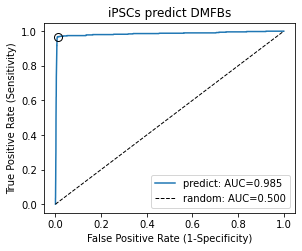

In [22]:
fig = plt.figure(figsize=(4.5, 3.5))  #dpi=300
ROC_plot(dmfbY.values, ipscscore_randomforest, threshold=0.5,base_line=True)

plt.title("iPSCs predict DMFBs")

# fig.savefig("/storage/yhhuang/users/ruiyan/figure/iPSC_predict_DMFB.pdf", dpi=300, bbox_inches='tight')